# Explore here

In [3]:
# Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


"Información sobre el acuífero de Petrignano. 
Se alimenta de tres acuíferos subterráneos separados por septos de baja permeabilidad; El nivel freático puede considerarse agua subterránea y también es alimentado por el río Chiascio."

 Nuestro Target es Depth_to_Groundwater_Podere_Casetta, ya que es donde los pozos anteriormente mencionados envian su agua 

In [4]:
aquifer_df = pd.read_csv ('/Users/luiseduardogarciablanco/Desktop/agua/acea-water-prediction/Aquifer_Petrignano.csv')
aquifer_df


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [5]:
aquifer_df.columns


Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [6]:
aquifer_df.shape
aquifer_df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [7]:
aquifer_df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64


Al eliminar filas que tienen valores nulos, en el siguiente resultado podemos ver que hay tipos similares de valores nulos en todas las columnas y también se restablece el índice.

In [8]:
aquifer_df = aquifer_df[aquifer_df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
aquifer_df.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

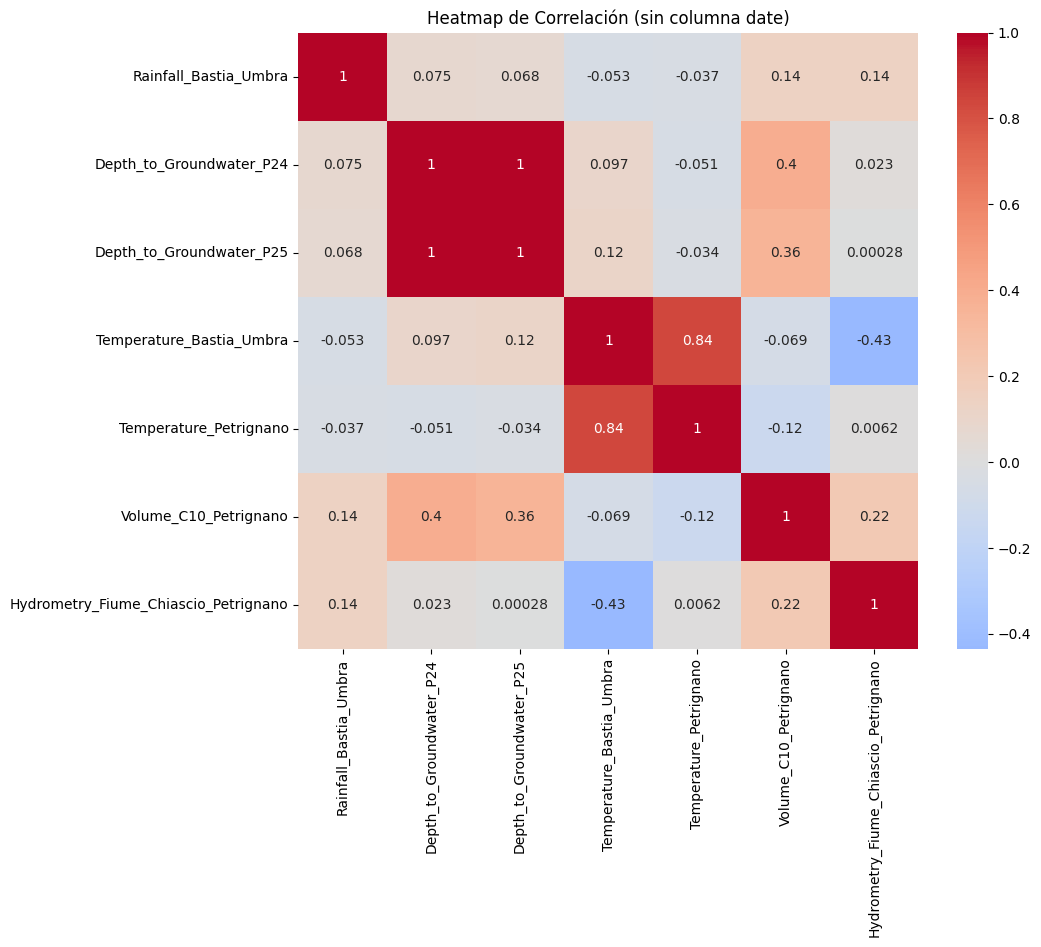

In [9]:
#mostramos un heatmap para ver correlaciones
# Genera y muestra el heatmap de correlación sin la columna 'date'
df_sin_date = aquifer_df.drop(columns=['Date'])

plt.figure(figsize=(10,8))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(df_sin_date.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación (sin columna date)')
plt.show()

De lo anterior podemos ver que Depth_to_Groundwater_P24 y Depth_to_Groundwater_P25 están altamente correlacionados, por lo que podemos eliminar una de las columnas.

De manera similar, para Temperature_Bastia_Umbra y Temperature_Petrignano podemos eliminar una de las columnas.

In [10]:
aquifer_df = aquifer_df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)
aquifer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4199 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P25              4172 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Volume_C10_Petrignano                 4198 non-null   float64
 5   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [11]:
#para entender mejor las columnas vamos a renombrarlas
#estas son las clumnas del df original
'''Index(['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25',
       'Temperature_Bastia_Umbra', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')'''


aquifer_df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']
aquifer_df.columns


Index(['date', 'rainfall', 'depth_to_groundwater', 'temperature',
       'drainage_volume', 'river_hydrometry'],
      dtype='object')

In [12]:
#verificamos que la fecha tenga el formato correcto
from datetime import datetime,date
aquifer_df['date'] = pd.to_datetime(aquifer_df['date'], format = '%d/%m/%Y')
aquifer_df = aquifer_df.sort_values(by='date')
aquifer_df


,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4


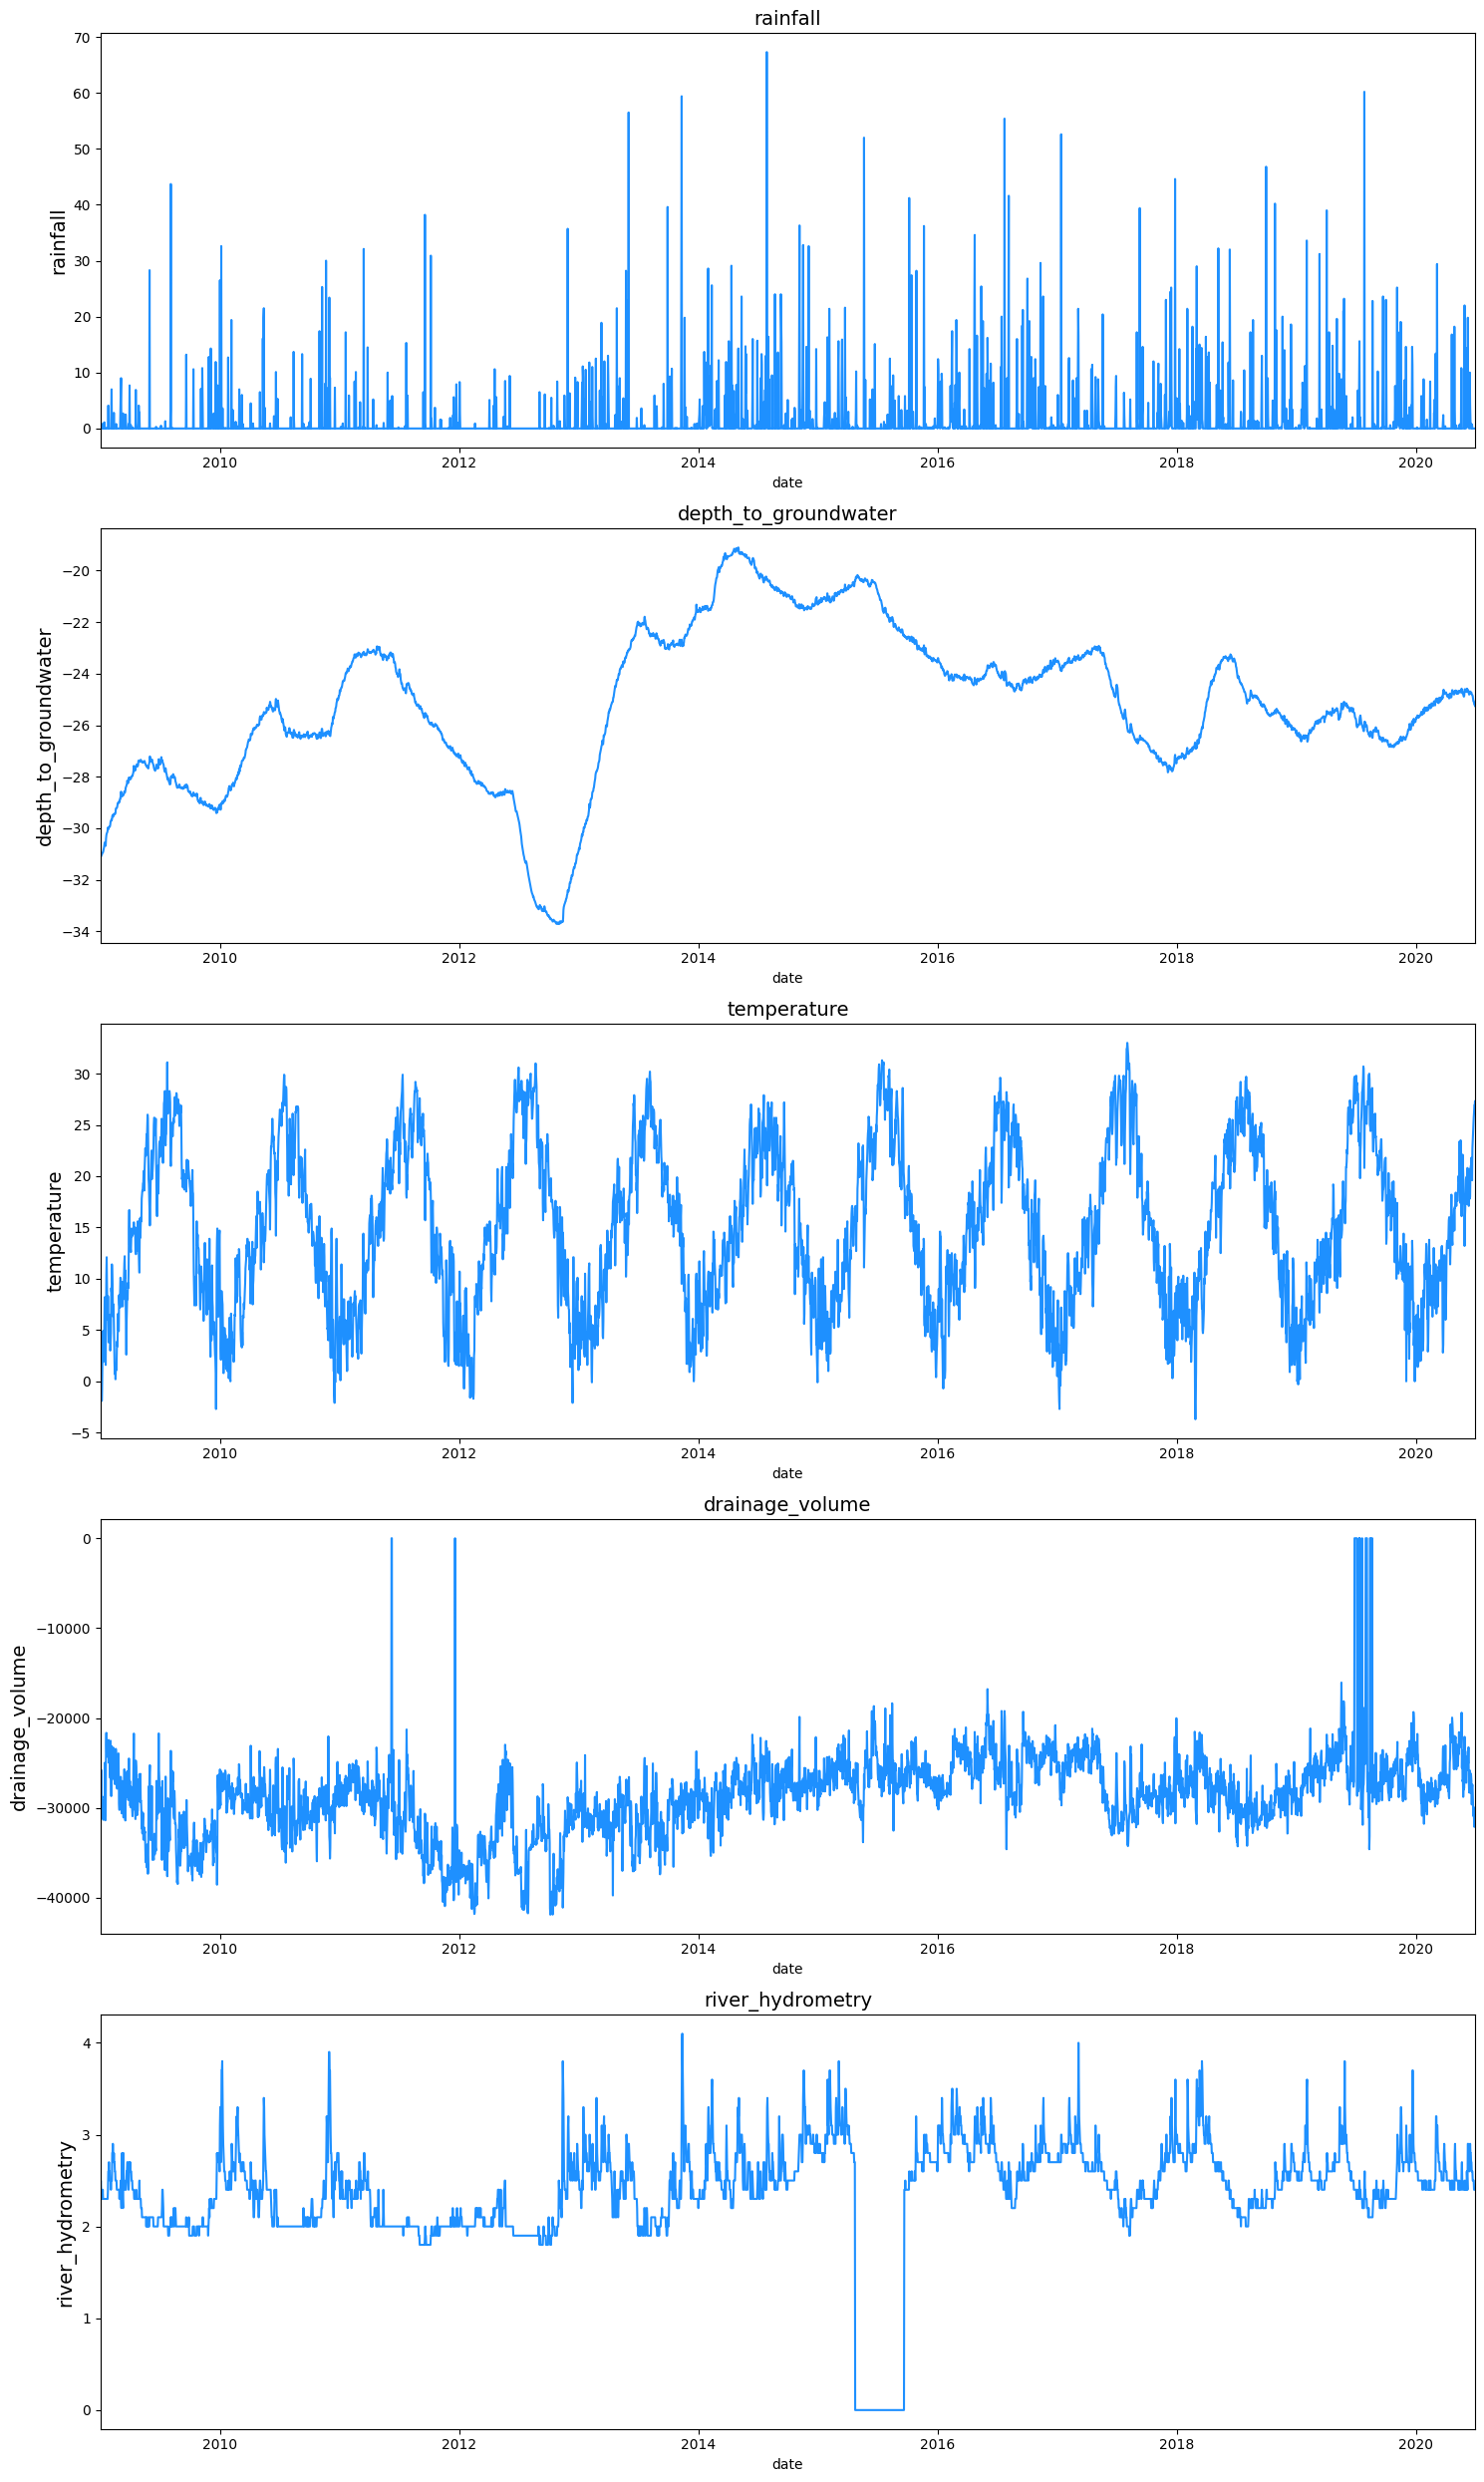

In [13]:
#graficamos para revisar los datos


f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(aquifer_df.drop('date', axis=1).columns):
    sns.lineplot(x=aquifer_df['date'], y=aquifer_df[column], ax=ax[i], color='dodgerblue')
    ax[i].set_title(format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Manejo de valores faltantes

Podemos ver que todavía hay algunos valores nulos en las variables.

También podemos ver que hay algunos valores cero en river_hidrometry, drainage_volume  y river_hydrometry que podemos reemplazar con valores nan y llenarlos después.


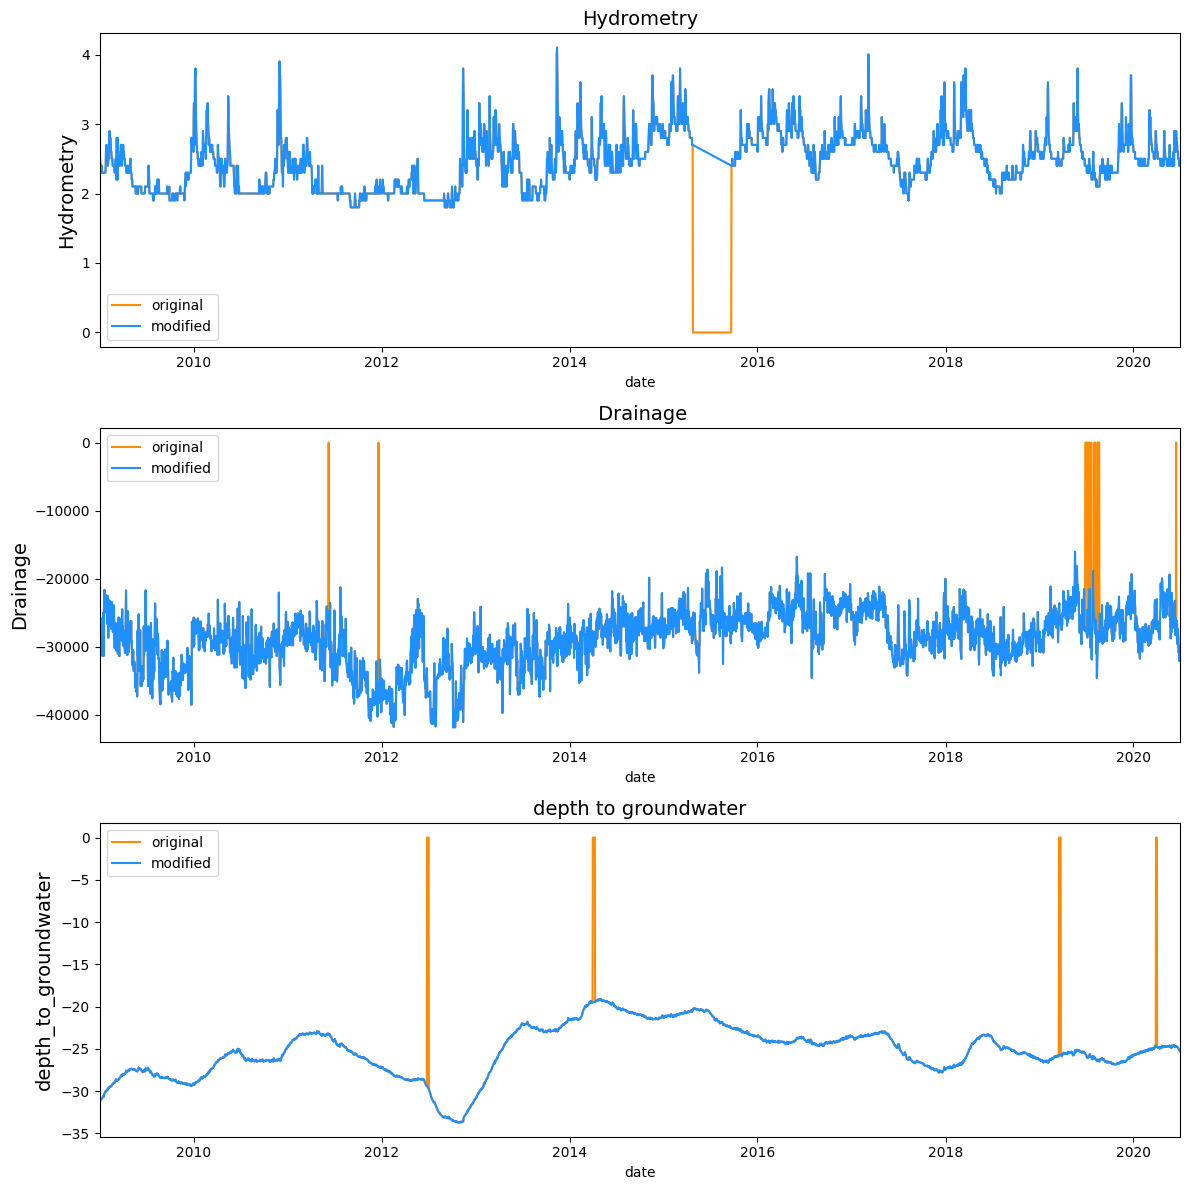

In [14]:
# setting rows, columns and size 
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

#para entender los valores que estan fuera de los rangos debemos cambiarlos por 0
aquifer_df.fillna(0, inplace=True)


# hydrometry having original values and hydrometry having zoeros replaced with nan
old_hydrometry = aquifer_df['river_hydrometry'].copy()
aquifer_df['river_hydrometry'] = aquifer_df['river_hydrometry'].replace(0, np.nan)

# ploting for old and new hydrometry

sns.lineplot(x=aquifer_df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=aquifer_df['date'], y=aquifer_df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')


ax[0].set_title('Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

#graficamos old and new Hydrometry

old_drainage = aquifer_df['drainage_volume'].copy()
aquifer_df['drainage_volume'] = aquifer_df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=aquifer_df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=aquifer_df['date'], y=aquifer_df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')

ax[1].set_title(' Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

#graficamos old and new depth_to_groundwater
old_depth = aquifer_df['depth_to_groundwater'].copy()
aquifer_df['depth_to_groundwater'] = aquifer_df['depth_to_groundwater'].replace(0, np.nan)

sns.lineplot(x=aquifer_df['date'], y=old_depth, ax=ax[2], color='darkorange', label='original')
sns.lineplot(x=aquifer_df['date'], y=aquifer_df['depth_to_groundwater'].fillna(np.inf), ax=ax[2], color='dodgerblue', label='modified')

ax[2].set_title('depth to groundwater', fontsize=14)
ax[2].set_ylabel(ylabel='depth_to_groundwater', fontsize=14)
ax[2].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

Aplicaremos la iterpolacion para tratar los valores faltantes, La interpolación es un método para estimar valores desconocidos que caen dentro del rango de un conjunto de datos conocido. En el contexto de un DataFrame, se usa para llenar valores faltantes (NaN) basándose en los valores existentes. La interpolación puede ser muy útil cuando los datos tienen valores que faltan de forma sistemática, y puedes suponer razonablemente que los valores faltantes se comportan de manera similar a los datos que los rodean.

In [15]:
#aplicamos la interpolacion de las variables draingage_volume, ryver_hydrometry y nuestera variable target depth_to_groundwater

aquifer_df['drainage_volume'] = aquifer_df['drainage_volume'].interpolate()
aquifer_df['river_hydrometry'] = aquifer_df['river_hydrometry'].interpolate()
aquifer_df['depth_to_groundwater'] = aquifer_df['depth_to_groundwater'].interpolate()

In [16]:
#verificamos la existencia de valores NaN
nan_por_columna = aquifer_df.isnull().sum()
print(nan_por_columna)

date                    0
rainfall                0
depth_to_groundwater    0
temperature             0
drainage_volume         0
river_hydrometry        0
dtype: int64


Para el moelo de prediccion a futuros, usaremos ARIMAX, este es proveniente del modelo ARIMA, qes un modelo de series temporales que se utiliza para predecir futuros valores basándose en sus propios valores pasados. 

El modelo ARIMAX incluye los componentes de ARIMA y añade variables exógenas (X):

	•	Exogenous Variables: Estas son variables externas que pueden tener un impacto en la variable dependiente que estás tratando de predecir. Por ejemplo, si estás prediciendo las ventas de un producto, las variables exógenas podrían incluir factores como el gasto en publicidad, el precio del producto, las condiciones económicas, etc.


In [17]:
# Convierte la columna 'Date' a formato de fecha para aplicar modelo arimax

aquifer_df['date'] = pd.to_datetime(aquifer_df['date'], format='%d/%m/%Y', errors='coerce')

# Elimina filas con NaT en la columna 'Date'
aquifer_df.dropna(subset=['date'], inplace=True)

# Establece la columna 'Date' como índice del DataFrame
aquifer_df.set_index('date', inplace=True)

# Verifica que el índice sea de tipo DatetimeIndex
print("Tipo de índice:", type(aquifer_df.index))
print("Primeros valores del índice:", aquifer_df.index[:5])
aquifer_df.head()

Tipo de índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Primeros valores del índice: DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', name='date', freq=None)


,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
date,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [18]:
# Definir la variable objetivo y las variables exógenas
y = aquifer_df['depth_to_groundwater']
X = aquifer_df[['rainfall', 'temperature', 'drainage_volume', 'river_hydrometry']]

In [19]:
# Define el tamaño del conjunto de prueba
test_size = 30

# Divide en datos de entrenamiento y prueba
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

In [20]:
import statsmodels.api as sm

# Ajustar el modelo ARIMAX
# Aquí (p, d, q) son los parámetros del modelo ARIMA, ajusta según sea necesario
model = sm.tsa.ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     depth_to_groundwater   No. Observations:                 4169
Model:                   ARIMA(1, 1, 1)   Log Likelihood                6351.172
Date:                  Tue, 30 Jul 2024   AIC                         -12688.344
Time:                          10:00:40   BIC                         -12643.998
Sample:                      01-01-2009   HQIC                        -12672.657
                           - 05-31-2020                                         
Covariance Type:                    opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
rainfall             0.0010   7.64e-05     13.582      0.000       0.001       0.001
temperature          0.0048      0.000     13.918      0.000       0.004       0.005
drainage_vol

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:

# Predecir los próximos 30 días
forecast = results.get_forecast(steps=test_size, exog=X_test)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [22]:
from sklearn.metrics import mean_squared_error

# Evaluar el modelo
mse = mean_squared_error(y_test, forecast_mean)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.045400532907998274


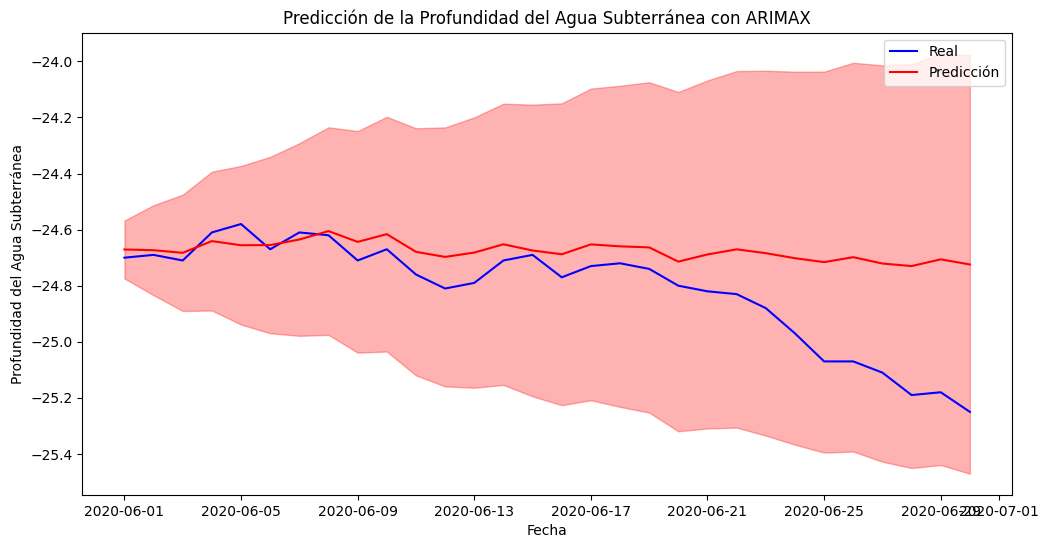

In [23]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y.index[-test_size:], y_test, label='Real', color='blue')
plt.plot(y.index[-test_size:], forecast_mean, label='Predicción', color='red')
plt.fill_between(y.index[-test_size:], 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='red', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Profundidad del Agua Subterránea')
plt.title('Predicción de la Profundidad del Agua Subterránea con ARIMAX')
plt.legend()
plt.show()

In [25]:
#guardamos modelo entrenado
from pickle import dump
dump(model, open("series temporales modelo agua.sav", "wb"))